In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sompy
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
import pdb
from pdb import set_trace as bp

Loaded backend module://ipykernel.pylab.backend_inline version unknown.


## SOM Tests

findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal regular normal>) = 10.05
findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal bold normal>) = 11.335
findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal regular normal>) = 10.05
findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal regular normal>) = 10.05
findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal bold normal>) = 10.335
findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal bold normal>) = 10.335
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal bold normal>) = 10.335
findfont: score(<Font 'DejaVu Serif' 

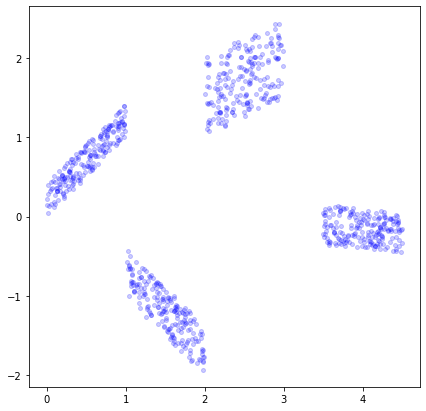

In [2]:
dlen = 200
Data1 = pd.DataFrame(data= 1*np.random.rand(dlen,2))
Data1.values[:,1] = (Data1.values[:,0][:,np.newaxis] + .42*np.random.rand(dlen,1))[:,0]


Data2 = pd.DataFrame(data= 1*np.random.rand(dlen,2)+1)
Data2.values[:,1] = (-1*Data2.values[:,0][:,np.newaxis] + .62*np.random.rand(dlen,1))[:,0]

Data3 = pd.DataFrame(data= 1*np.random.rand(dlen,2)+2)
Data3.values[:,1] = (.5*Data3.values[:,0][:,np.newaxis] + 1*np.random.rand(dlen,1))[:,0]


Data4 = pd.DataFrame(data= 1*np.random.rand(dlen,2)+3.5)
Data4.values[:,1] = (-.1*Data4.values[:,0][:,np.newaxis] + .5*np.random.rand(dlen,1))[:,0]


Data1 = np.concatenate((Data1,Data2,Data3,Data4))

fig = plt.figure()
plt.plot(Data1[:,0],Data1[:,1],'ob',alpha=0.2, markersize=4)
fig.set_size_inches(7,7)

In [3]:


mapsize = [20,20]
som = sompy.SOMFactory.build(Data1, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch', name='sompy')  # this will use the default parameters, but i can change the initialization and neighborhood methods
som.train(n_job=1, verbose='info')  # verbose='debug' will print more, and verbose=None wont print anything



 Training...
 pca_linear_initialization took: 0.012000 seconds
 Rough training...
 radius_ini: 3.000000 , radius_final: 1.000000, trainlen: 15

 epoch: 1 ---> elapsed time:  0.117000, quantization error: 0.233118

 epoch: 2 ---> elapsed time:  0.108000, quantization error: 0.111855

 epoch: 3 ---> elapsed time:  0.109000, quantization error: 0.077692

 epoch: 4 ---> elapsed time:  0.109000, quantization error: 0.075298

 epoch: 5 ---> elapsed time:  0.107000, quantization error: 0.068530

 epoch: 6 ---> elapsed time:  0.121000, quantization error: 0.064703

 epoch: 7 ---> elapsed time:  0.107000, quantization error: 0.061390

 epoch: 8 ---> elapsed time:  0.121000, quantization error: 0.056679

 epoch: 9 ---> elapsed time:  0.111000, quantization error: 0.053551

 epoch: 10 ---> elapsed time:  0.129000, quantization error: 0.050184

 epoch: 11 ---> elapsed time:  0.129000, quantization error: 0.046798

 epoch: 12 ---> elapsed time:  0.128000, quantization error: 0.043446

 epoch: 13 --

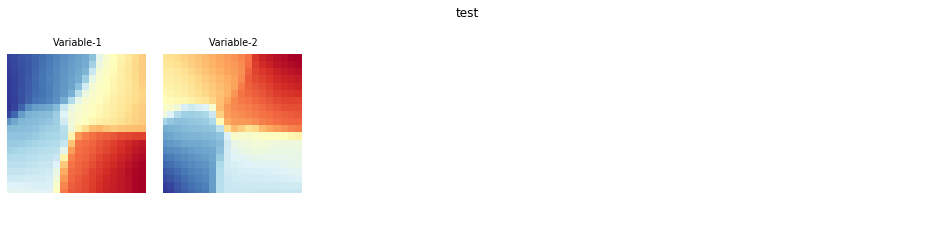

In [4]:
v = sompy.mapview.View2DPacked(50, 50, 'test',text_size=8)  
# could be done in a one-liner: sompy.mapview.View2DPacked(300, 300, 'test').show(som)
v.show(som, what='codebook', which_dim=[0,1], cmap=None, col_sz=6) #which_dim='all' default
# v.save('2d_packed_test')

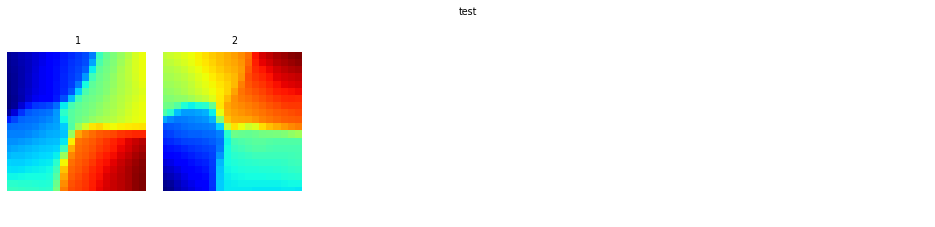

In [5]:


som.component_names = ['1','2']
v = sompy.mapview.View2DPacked(50, 50, 'test',text_size=8)  
v.show(som, what='codebook', which_dim='all', cmap='jet', col_sz=6) #which_dim='all' default



In [6]:
# c = sompy.mapview.View2DPacked()
v = sompy.mapview.View2DPacked(2, 2, 'test',text_size=8)  
#first you can do clustering. Currently only K-means on top of the trained som
cl = som.cluster(n_clusters=4)
# print cl
getattr(som, 'cluster_labels')

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 1, 3, 3, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,

/home/l7/dev/tools/anaconda3/envs/analytics_system_env_3.6.5/lib/python3.6/site-packages/SOMPY-1.0-py3.6.egg/sompy/visualization/mapview.py:163: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


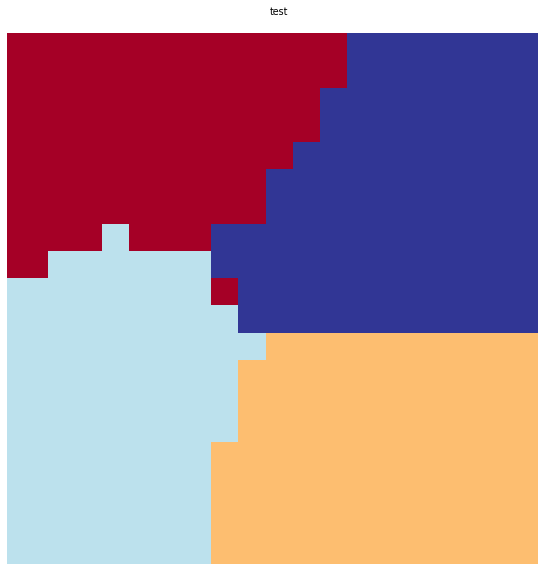

In [7]:
v.show(som, what='cluster')

/home/l7/dev/tools/anaconda3/envs/analytics_system_env_3.6.5/lib/python3.6/site-packages/SOMPY-1.0-py3.6.egg/sompy/visualization/hitmap.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


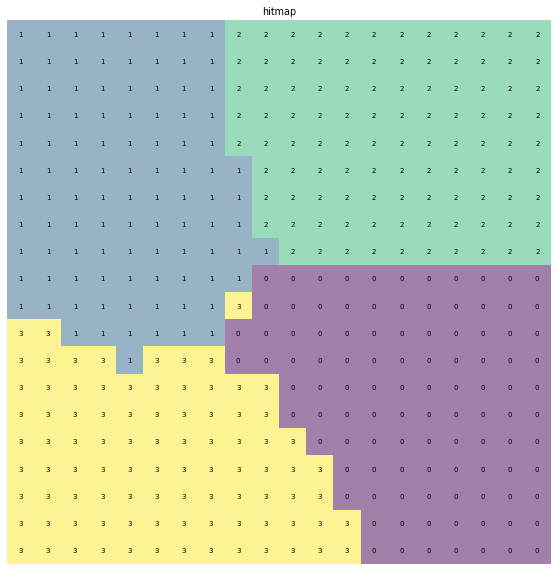

In [8]:
h = sompy.hitmap.HitMapView(10, 10, 'hitmap', text_size=8, show_text=True)
h.show(som)

In [45]:
test_data = np.zeros([dlen,3])
test_data[:,0] = np.random.normal(loc=0, scale=2, size=dlen)
test_data[:,1] = np.random.rayleigh(scale=6.0, size=dlen)
test_data[:,2] = np.random.uniform(low=4, high=5, size=dlen)

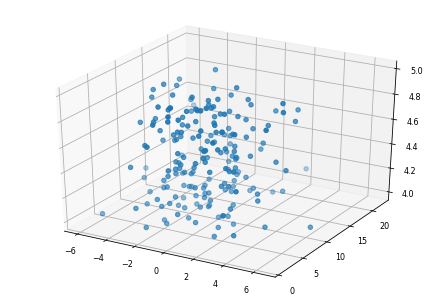

In [51]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(test_data[:,0], test_data[:,1], test_data[:,2])
plt.show()

In [52]:
test_data_df = pd.DataFrame(data=test_data, columns=['normal', 'rayleigh', 'uniform'])

In [53]:
map_size = [20, 20]
som = sompy.SOMFactory.build(test_data, 
                             mapsize, 
                             mask=None, 
                             mapshape='planar', 
                             lattice='rect', 
                             normalization='var', 
                             initialization='pca', 
                             neighborhood='gaussian', 
                             training='batch', 
                             name='sompy')  
# this will use the default parameters, but i can change the initialization and neighborhood methods
som.train(n_job=1, verbose='info')  # verbose='debug' will print more, and verbose=None wont print anything

 Training...
 pca_linear_initialization took: 0.011000 seconds
 Rough training...
 radius_ini: 3.000000 , radius_final: 1.000000, trainlen: 60

 epoch: 1 ---> elapsed time:  0.113000, quantization error: 0.958724

 epoch: 2 ---> elapsed time:  0.112000, quantization error: 0.797465

 epoch: 3 ---> elapsed time:  0.111000, quantization error: 0.641610

 epoch: 4 ---> elapsed time:  0.115000, quantization error: 0.589195

 epoch: 5 ---> elapsed time:  0.111000, quantization error: 0.569160

 epoch: 6 ---> elapsed time:  0.110000, quantization error: 0.559479

 epoch: 7 ---> elapsed time:  0.108000, quantization error: 0.552955

 epoch: 8 ---> elapsed time:  0.121000, quantization error: 0.546129

 epoch: 9 ---> elapsed time:  0.110000, quantization error: 0.536320

 epoch: 10 ---> elapsed time:  0.130000, quantization error: 0.530711

 epoch: 11 ---> elapsed time:  0.109000, quantization error: 0.524964

 epoch: 12 ---> elapsed time:  0.128000, quantization error: 0.518838

 epoch: 13 --

In [55]:
som.component_names = test_data_df.columns

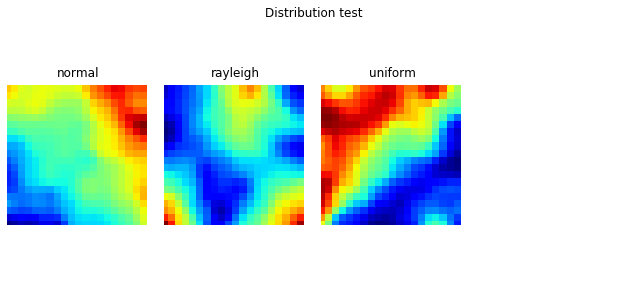

In [58]:
v = sompy.mapview.View2DPacked(50,50,'Distribution test',
                              text_size=10)
v.show(som, what='codebook', which_dim='all', cmap='jet', col_sz=4)

In [68]:
v = sompy.mapview.View2DPacked(2, 2, 'test',text_size=8) 
cl = som.cluster(n_clusters=3)
#getattr(som, 'cluster_labels')

/home/l7/dev/tools/anaconda3/envs/analytics_system_env_3.6.5/lib/python3.6/site-packages/SOMPY-1.0-py3.6.egg/sompy/visualization/mapview.py:163: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


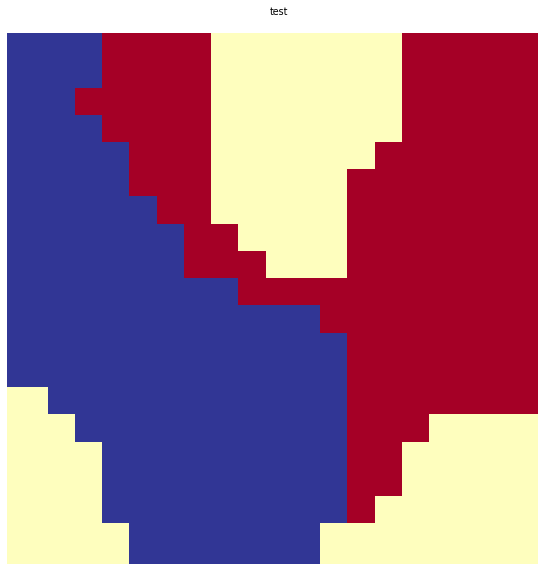

In [69]:
v.show(som, what='cluster')

/home/l7/dev/tools/anaconda3/envs/analytics_system_env_3.6.5/lib/python3.6/site-packages/SOMPY-1.0-py3.6.egg/sompy/visualization/hitmap.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


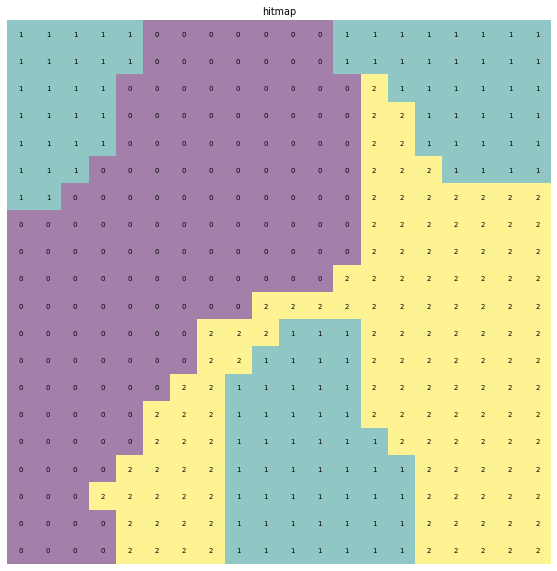

In [70]:
h = sompy.hitmap.HitMapView(10, 10, 'hitmap', text_size=8, show_text=True)
h.show(som)

In [82]:
som.project_data(np.array([[5, 2, 3],[5, 0, 0]]).reshape([2,3]))

array([199, 219])

In [87]:
bmu = som.find_bmu(np.array([1, 2, 3]).reshape([1,3]))
som.bmu_ind_to_xy(bmu.ravel())

array([[  0,  10,  10],
       [  0,   9, -10]])